In [4]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops



In [5]:
pwd

'C:\\Users\\AYUSH KHANDELWAL'

In [6]:
def load_dataset():
    train_dataset = h5py.File('data/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('data/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [7]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()


y = 5


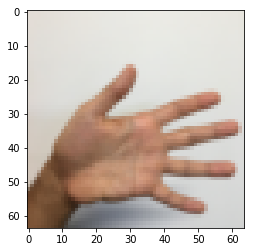

In [8]:
index=0
plt.imshow(X_train_orig[index])
print ("y = "+str(np.squeeze(Y_train_orig[:,index])))

In [13]:
print (np.squeeze(Y_train_orig[:,0]))

5


In [21]:
print (X_train_orig.shape)
print (X_test_orig.shape)

(1080, 64, 64, 3)
(120, 64, 64, 3)


In [17]:
print (X_train_orig.shape[0])

1080


In [18]:
X_train_flatten=X_train_orig.reshape(X_train_orig.shape[0],-1).T

In [19]:
X_test_flatten=X_test_orig.reshape(X_test_orig.shape[0],-1).T

In [22]:
print (X_train_flatten.shape)
print (X_test_flatten.shape)

(12288, 1080)
(12288, 120)


In [23]:
print (Y_train_orig.shape)

(1, 1080)


In [24]:
X_train=X_train_flatten/255

In [25]:
X_test=X_test_flatten/255

In [27]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [28]:
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

In [29]:
print("number of training examples = " + str(X_train.shape[1]))
print("number of test examples = " + str(X_test.shape[1]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [32]:
def create_placeholders(n_x,n_y):
    X=tf.placeholder(tf.float32,[n_x,None])
    Y=tf.placeholder(tf.float32,[n_y,None])
    return X,Y

In [35]:
X,Y=create_placeholders(12288,6)
print (str(X))

Tensor("Placeholder_2:0", shape=(12288, ?), dtype=float32)


In [46]:
tf.reset_default_graph()
def initialize_parameters():
    W1 = tf.get_variable("W1", [25, 12288], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [25, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer = tf.zeros_initializer())
    
    parameters={"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    return parameters

In [47]:
parameters=initialize_parameters()

In [53]:
print (parameters["W1"])
print (parameters["b1"])
print (parameters["W2"])
print (parameters["b2"])

<tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
<tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
<tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
<tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [55]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1=tf.add(tf.matmul(W1,X),b1)
    A1=tf.nn.relu(Z1)
    Z2=tf.add(tf.matmul(W2,A1),b2)
    A2=tf.nn.relu(Z2)
    Z3=tf.add(tf.matmul(W3,A2),b3)
    
    return Z3

In [61]:
tf.reset_default_graph()
X,Y=create_placeholders(12288,6)
parameters=initialize_parameters()
Z3=forward_propagation(X,parameters)

In [63]:
print (Z3)

Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [70]:
def compute_cost(Z3,Y):
    logits=tf.transpose(Z3)
    labels=tf.transpose(Y)
    
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    
    return cost

In [72]:
tf.reset_default_graph()
X,Y=create_placeholders(12288,6)
parameters=initialize_parameters()
Z3=forward_propagation(X,parameters)
cost=compute_cost(Z3,Y)
print (cost)

Tensor("Mean:0", shape=(), dtype=float32)


In [74]:
def random_mini_batches(X, Y, mini_batch_size = 32, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [81]:
def model(X_train,Y_train,X_test,Y_test,learning_rate=0.0001,num_epochs=1500,minibatch_size=32,print_cost=True):
    
    ops.reset_default_graph()
    
    (n_x,m)=X_train.shape
    n_y=Y_train.shape[0]
    costs=[]
    
    X,Y=create_placeholders(n_x,n_y)
    parameters=initialize_parameters()
    
    Z3=forward_propagation(X,parameters)
    cost=compute_cost(Z3,Y)
    
    optimizer=tf.train.AdamOptimizer(learning_rate).minimize(cost)
    init=tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)

        for epoch in range(num_epochs):
            epoch_cost=0

            num_minibatches=m/minibatch_size
            minibatches=random_mini_batches(X_train,Y_train,minibatch_size)

            for minibatch in minibatches:

                (minibatch_X,minibatch_Y)=minibatch
                _, minibatch_cost=sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})

                epoch_cost+=minibatch_cost/num_minibatches



             # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)


        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        print("Parameters have been trained!")

        correct_prediction=tf.equal(tf.argmax(Z3),tf.argmax(Y))

        accuracy=tf.reduce_mean(tf.cast(correct_prediction,"float"))

        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))

        return parameters
    

Cost after epoch 0: 1.824672
Cost after epoch 100: 0.782380
Cost after epoch 200: 0.563190
Cost after epoch 300: 0.422720
Cost after epoch 400: 0.314439
Cost after epoch 500: 0.232254
Cost after epoch 600: 0.171117
Cost after epoch 700: 0.139820
Cost after epoch 800: 0.089827
Cost after epoch 900: 0.059888
Cost after epoch 1000: 0.062021
Cost after epoch 1100: 0.031986
Cost after epoch 1200: 0.019412
Cost after epoch 1300: 0.012744
Cost after epoch 1400: 0.402661


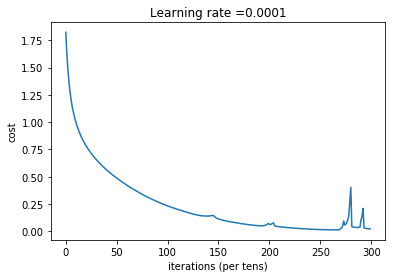

Parameters have been trained!


ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [78]:
parameters = model(X_train, Y_train, X_test, Y_test)


Cost after epoch 0: 1.824672
Cost after epoch 100: 0.782380
Cost after epoch 200: 0.563190
Cost after epoch 300: 0.422720
Cost after epoch 400: 0.314439
Cost after epoch 500: 0.232254
Cost after epoch 600: 0.171117
Cost after epoch 700: 0.139820
Cost after epoch 800: 0.089827
Cost after epoch 900: 0.059888
Cost after epoch 1000: 0.062021
Cost after epoch 1100: 0.031986
Cost after epoch 1200: 0.019412
Cost after epoch 1300: 0.012744
Cost after epoch 1400: 0.402661


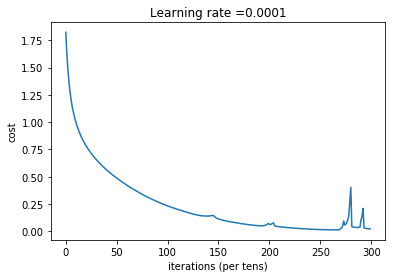

Parameters have been trained!
Train Accuracy: 0.99444443
Test Accuracy: 0.825


In [82]:
parameters = model(X_train, Y_train, X_test, Y_test)